In [2]:
import numpy as np
import pandas as pd
import math
import re
import matplotlib.pyplot as plt

In [3]:
equation = '  3x^2-2x+12 + x - 17x^4  '

In [4]:
equation


'  3x^2-2x+12 + x - 17x^4  '

In [5]:
equation = '  3x^2-2x+12 + x - 17x^4  '
equation = equation.strip()
equation = re.sub(r"\^","**",equation)
equation = re.sub(r"x","*x",equation)
equation = equation.replace(" ","")
equation = re.sub(r"\+\*","+",equation)
equation = re.sub(r"\-\*","-",equation)
equation

'3*x**2-2*x+12+x-17*x**4'

## Formula que parsea ecuaciones

In [6]:
def formula(equation):
    equation = equation.strip()
    equation = re.sub(r"\^","**",equation)
    equation = re.sub(r"x","*x",equation)
    equation = equation.replace(" ","")
    equation = re.sub(r"\+\*","+",equation)
    equation = re.sub(r"\-\*","-",equation)
    return equation

In [7]:
formula('2x+3x^2 + x')

'2*x+3*x**2+x'

In [8]:
def eval_formula(equation,x):
    return eval(formula(equation))

In [9]:
eval_formula('2x + 17x^2',2)

72

## Funcion que evalua derivadas 

In [10]:
def eval_derivative(equation,x,h):
    equation = formula(equation)
    part_1 = equation.replace("x", '(x + (2*h))')
    part_2 = equation.replace("x", '(x + h)')
    
    derivative = '-('+part_1 + '-4*('+part_2 +')' + '+3*('+ equation +')'+')'+'/'+'(2*h)'
    return eval(derivative)

In [11]:
eval_derivative( '  3x^2-2x+12 - 1  ',0,0.00001)

-1.9999999999242843

## Newton Rhapson 

In [12]:
def newton_rhapson(equation,x_0 ,tolerance):
    error = 1
    h = 0.00001
    df = pd.DataFrame(columns=['i','x_k','x_k1','F(x)',"f'(x)",'error'])
    x = x_0
    i = 0
    while error > tolerance:
        x_k = x
        x = x - (eval_formula(equation,x))/eval_derivative(equation,x,h)
        error = np.abs(x-x_k)
        i+=1
        run = {'i':i, 'x_k':x_k, 'x_k1':x,'F(x)':eval_formula(equation,x),"f'(x)":eval_derivative(equation,x,h), 'error':error}
        df = df.append(run, ignore_index=True)
        x_estrella = x_k
    return df, x_estrella

## Para este ejercicio no pasamos la funcion, si no su derivada. Esto para poder encontrar el minimo.

In [46]:
table, x_star = newton_rhapson('16x^3 -4', 1,0.000001)

In [47]:
table

,i,x_k,x_k1,F(x),f'(x),error
0,1.0,1.000000,0.750000,2.750000e+00,27.000000,2.500000e-01
1,2.0,0.750000,0.648148,3.565513e-01,20.164609,1.018519e-01
2,3.0,0.648148,0.630466,9.638572e-03,19.079401,1.768204e-02
3,4.0,0.630466,0.629961,7.721164e-06,19.048837,5.051821e-04
4,5.0,0.629961,0.629961,4.965806e-12,19.048813,4.053352e-07


# ¿Es mínimo local o global? 
El valor de x_star lo que nos está dando es un mínimo global ya que es una función convexa, y todo mínimo local es un mínimo global.

In [48]:
x_star

0.6299609302828674

In [50]:
16*x_star**3 -4

7.721163639118345e-06

In [51]:
abs(table.iloc[:,1] - x_star)

0    0.370039
1    0.120039
2    0.018187
3    0.000505
4    0.000000
Name: x_k, dtype: float64

## Gráfica de convergencia 

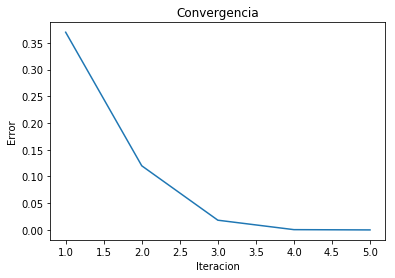

In [52]:
plt.plot(table.iloc[:,0],abs(table.iloc[:,1] - x_star))
plt.title("Convergencia")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()


El error viene bajando en cada iteración de la función. Después de 7 iteraciones converge. 

## Generar regresión para obtener tasa de convergencia y constante C 

In [53]:
ek = []
ek1 = []
for x_k in table.iloc[0:table.shape[0],1]:
    ek.append(np.log(np.abs(x_k - x_star)))
ek1 = ek[1:len(ek)]
ek = ek[0:len(ek)-1]
ek1= ek[1:len(ek)]
ek = ek[0:len(ek)-1]
log_error_table = pd.DataFrame()
log_error_table['ek'] = ek
log_error_table['ek1'] = ek1
log_error_table

C:\Users\jctep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


,ek,ek1
0,-0.994147,-2.119938
1,-2.119938,-4.007036
2,-4.007036,-7.590592


In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  #objeto para manejar regresion lineal
model.fit(log_error_table[['ek']], log_error_table[['ek1']])  #creamos modelo X y 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
r = model.coef_
print("Convergence rate r: ", float(r))

Convergence rate r:  1.824348122030814


In [56]:
C = np.exp(model.intercept_)
print("Constant C: ", float(C))

Constant C:  0.7850137145890798


### Bisection

In [78]:
def bisection(equation,a,b,tolerance):
    x = (a + b)/2
    h = 0.00001
    error = 10
    i = 0
    df = pd.DataFrame(columns=['i','x_k','x_k1','F(x)','error'])
    while error > tolerance:
        x_k = x
        x = (a + b)/2
        f_a = eval_formula(equation,a)
        f_c = eval_formula(equation,x)
        f_b = eval_formula(equation,b)
        #if f_a * f_b > 0:
        #    print("Method failed, interval does not contain the root")
         #   break
        if f_c == 0:
            x_star = c
            i+=1
            run = {'i':i, 'x_k':x_k, 'x_k1':x,'F(x)':f_c, 'error':error}
            df = df.append(run, ignore_index=True)
            break
        elif f_a * f_c < 0:
            b = x
            i+=1
            run = {'i':i, 'x_k':x_k, 'x_k1':x,'F(x)':f_c, 'error':error}
        else:
            a = x
        x_star = x
        error = np.abs(f_c)
        i+=1
        run = {'i':i, 'x_k':x_k, 'x_k1':x,'F(x)':f_c, 'error':error}
        df = df.append(run, ignore_index=True)
    print("root:",x_star)
    print("iterations required:",i)
    return df, x_star
        

In [79]:
table_bi, x_star_bi= bisection('16x^3 -4',0.5,1.5,.000001)

root: 0.6299605369567871
iterations required: 36


In [80]:
table_bi

,i,x_k,x_k1,F(x),error
0,2.0,1.000000,1.000000,1.200000e+01,1.200000e+01
1,4.0,1.000000,0.750000,2.750000e+00,2.750000e+00
2,5.0,0.750000,0.625000,-9.375000e-02,9.375000e-02
3,7.0,0.625000,0.687500,1.199219e+00,1.199219e+00
4,9.0,0.687500,0.656250,5.219727e-01,5.219727e-01
5,11.0,0.656250,0.640625,2.066040e-01,2.066040e-01
6,13.0,0.640625,0.632812,5.457306e-02,5.457306e-02
7,14.0,0.632812,0.628906,-2.004910e-02,2.004910e-02
8,16.0,0.628906,0.630859,1.714647e-02,1.714647e-02
9,17.0,0.630859,0.629883,-1.480147e-03,1.480147e-03


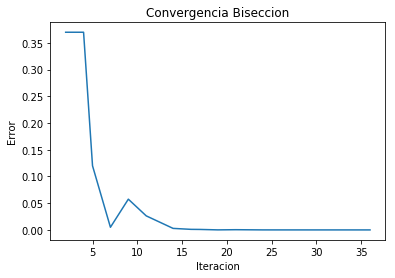

In [81]:
plt.plot(table_bi.iloc[:,0],abs(table_bi.iloc[:,1] - x_star_bi))
plt.title("Convergencia Biseccion")
plt.xlabel("Iteracion")
plt.ylabel("Error")
plt.show()

## Regresión de errores para metodo de biseccion 

In [82]:
ek_bi = []
ek1_bi = []
for x_k in table_bi.iloc[0:table_bi.shape[0],1]:
    ek_bi.append(np.log(np.abs(x_k - x_star_bi)))
ek1_bi = ek_bi[1:len(ek_bi)]
ek_bi = ek_bi[0:len(ek_bi)-1]
ek1_bi= ek_bi[1:len(ek_bi)]
ek_bi = ek_bi[0:len(ek_bi)-1]
log_error_table_bi = pd.DataFrame()
log_error_table_bi['ek'] = ek_bi
log_error_table_bi['ek1'] = ek1_bi
log_error_table_bi

,ek,ek1
0,-0.994146,-0.994146
1,-0.994146,-2.119935
2,-2.119935,-5.306241
3,-5.306241,-2.855284
4,-2.855284,-3.638587
5,-3.638587,-4.540838
6,-4.540838,-5.859748
7,-5.859748,-6.854891
8,-6.854891,-7.014408
9,-7.014408,-9.462341


In [83]:
len(log_error_table_bi)

19

In [84]:
model_bi = LinearRegression()  #objeto para manejar regresion lineal
model_bi.fit(log_error_table_bi[['ek']], log_error_table_bi[['ek1']])  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
r_bi = model_bi.coef_
print("Convergence rate r for bisection model: ", float(r_bi))

Convergence rate r for bisection model:  0.9495930613176616


In [86]:
C_bi = np.exp(model_bi.intercept_)
print("Constant C for bisection model: ", float(C_bi))

Constant C for bisection model:  0.34075951899106544


In [87]:
print("Convergence rate r: ", float(r))
print("Convergence rate r for bisection model: ", float(r_bi))
print("Constant C: ", float(C))
print("Constant C for bisection model: ", float(C_bi))

Convergence rate r:  1.824348122030814
Convergence rate r for bisection model:  0.9495930613176616
Constant C:  0.7850137145890798
Constant C for bisection model:  0.34075951899106544


## Conclusiones 

Analíticamente sabemos que el método de Newton Rhapson tiene una tasa de convergencia cuadrática y Bisección una tasa de convergencia lineal. Esto implica que el método de Newton Rhapson converge con mayor velocidad al punto estacionario de la función comparado al método de la bisección.

Probando esto por medio de un método iterativo y estimando los parámetros de convergencia de ambas funciones, podemos ver que empíricamente la tasa de convergencia de Newton Rhapson tiende a 2 y la de bisección a 1, comprobando lo visto analíticamente.

También es importante mencionar que Newton Rhapson alcanzó la convergencia en 5 iteraciones mientras que Bisección le tomó 20 iteraciones, haciendo que Newton Rhapson sea un método superior.